TRABAJO FINAL MODULO 5

In [1]:
!pip install pyspc
from pyspc import *

  Created wheel for pyspc: filename=pyspc-0.4-cp37-none-any.whl size=30877 sha256=459dc710e5c742c9b8095690a8bac0fefb93533a4e2dcc3877f9417678a48d03
  Stored in directory: /home/ratkon/.cache/pip/wheels/bf/03/f8/b15370eb2f37f1fbc6b921ce1460d94f81f6cb648926086991
Successfully built pyspc


Fuente de datos: https://www.kaggle.com/samar555/tunisian-production-by-product#Production%20by%20product.csv

In [20]:
df = pd.read_csv("Production by product.csv")

# observar el conjunto de datos
df.head()

,Year,Agriculture and Fisheries,Agro-food Industry,Tobacco Industry,"Textile, Clothing and Leather",Various industries,Oil refining,Chemical industries,"Building materials, ceramics and glass",Mechanical and electrical industries,...,Maintenance and repair,Trade,Hotel and restaurant services,Transport,Post and telecommunications,Financial Services,Other market services,Non-market services,Including Public Administration,Total
0,1997,3337.0,3630.8,59.0,4176.7,1604.9,427.7,1990.9,866.1,2196.7,...,300.6,2368.1,2245.4,2825.8,574.9,983.0,4046.3,3974.2,3815.1,40412.9
1,1998,3418.7,3582.4,64.5,4578.3,1695.7,363.4,2161.7,919.4,2608.9,...,316.4,2587.9,2440.1,3103.6,697.4,1043.2,4369.4,4316.4,4150.4,43333.2
2,1999,3753.2,4281.3,80.0,4777.3,1838.5,420.5,2274.8,974.0,2816.7,...,336.2,2828.0,2698.0,3340.8,697.4,1169.1,4782.3,4680.9,4508.9,47397.9
3,2000,3836.4,4728.1,94.4,5076.2,2000.4,681.4,2245.7,1031.5,3071.3,...,368.9,3016.3,2846.8,3674.3,818.0,1299.0,4928.4,5174.3,4999.6,51301.4
4,2001,3929.3,4520.1,101.6,5935.2,2125.4,634.5,2355.3,1091.2,3451.4,...,401.7,3317.5,2999.0,3967.8,1055.7,1368.3,5468.7,5537.6,5357.6,54984.9


In [21]:
#Limpieza
cdf = df[['Year','Textile, Clothing and Leather']]
cdf.head(9)

,Year,"Textile, Clothing and Leather"
0,1997,4176.7
1,1998,4578.3
2,1999,4777.3
3,2000,5076.2
4,2001,5935.2
5,2002,6109.9
6,2003,6104.1
7,2004,6296.9
8,2005,6198.1


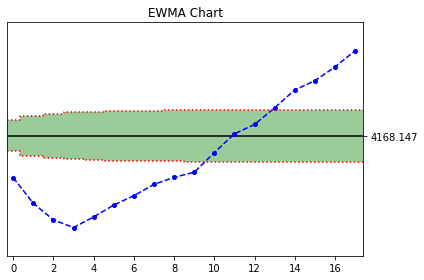

<pyspc: (8730082362169)>


In [22]:
a = spc(cdf) + ewma()
print(a)

LINEAR AND MIP

Proveer de personal a los distintos turnos en la fabricacion de indumentaria médica. Minimizando costos de mano de obra por turno, satisfaciendo demanda de produccion.

Se tiene 3 turnos: Mañana, tarde y noche.
Se tiene los siguientes trabajadores:
Nombre     Disponibilidad      Costo por turno
Alex          1,2,3               30
Soraya        1,2                 20
Diego         1,2                 25
Marcelo       1,2,3               25
Lizeth        2,3                 15
Alberto       1,3                 20
Agustin       1,2                 15
Adan          1,2,3               30
Ruben         1,2,3               30  

In [24]:
!pip install pulp

     |████████████████████████████████| 39.2MB 3.1MB/s eta 0:00:012    |████████████                    | 14.8MB 2.6MB/s eta 0:00:10     |█████████████████▉              | 21.9MB 10.5MB/s eta 0:00:02     |███████████████████████████▎    | 33.5MB 3.6MB/s eta 0:00:02     |███████████████████████████████▉| 39.0MB 3.1MB/s eta 0:00:01


In [32]:
import pulp as pl
import collections as cl

# data
shift_requirements = [6, 7, 4]
workers = {
    "Alex": {
        "availability": [0, 1, 2],
        "cost": 30
    },
    "Soraya": {
        "availability": [0, 1],
        "cost": 20
    },
    "Diego": {
        "availability": [0, 1],
        "cost": 25
    },
    "Marcelo": {
        "availability": [0, 1, 2],
        "cost": 25
    },
    "Lizeth": {
        "availability": [1,2],
        "cost": 15
    },
    "Alberto": {
        "availability": [0, 2],
        "cost": 20
    },
    "Agustin": {
        "availability": [0, 2],
        "cost": 35
    },
    "Adan": {
        "availability": [0, 1, 2],
        "cost": 30
    },
    "Ruben": {
        "availability": [0, 1, 2],
        "cost": 30
    }
}

In [33]:
# define el modelo: queremos minimizar el costo
prob = pl.LpProblem("scheduling", pl.LpMinimize)

# algunos modelos de variable
cost = []
vars_by_shift = cl.defaultdict(list)

for worker, info in workers.items():
    for shift in info['availability']:
        worker_var = pl.LpVariable("%s_%s" % (worker, shift), 0, 1, pl.LpInteger)
        vars_by_shift[shift].append(worker_var)
        cost.append(worker_var * info['cost'])

# establece el objetivo para que sea la suma del costo
prob += sum(cost)

# establece los requerimientos de cambio
for shift, requirement in enumerate(shift_requirements):
    prob += sum(vars_by_shift[shift]) >= requirement

In [34]:
status = prob.solve()
print("Result:", pl.LpStatus[status])
results = []
for shift, vars in vars_by_shift.items():
    results.append({
        "shift": shift,
        "workers": [var.name for var in vars if var.varValue == 1],
    })

for result in sorted(results, key=lambda x: x['shift']):
    print("Turno:", result['shift'], 'Trabajadores:', ', '.join(result['workers']))

Result: Optimal
Turno: 0 Trabajadores: Alex_0, Soraya_0, Diego_0, Marcelo_0, Alberto_0, Adan_0
Turno: 1 Trabajadores: Alex_1, Soraya_1, Diego_1, Marcelo_1, Lizeth_1, Adan_1, Ruben_1
Turno: 2 Trabajadores: Alex_2, Marcelo_2, Lizeth_2, Alberto_2
